# **Importing modules and getting the Data**

In [31]:
#importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math as m
# Read the dataset
cars_df = pd.read_csv("https://raw.githubusercontent.com/kratiagarwalds/Car-price-prediction-model/main/car-prices.csv")
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [32]:
#Getting the information on the dataset.
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#**Data Cleaning Activities** 

In [33]:
#Display the first 25 rows of the 'CarName' column.
cars_df['CarName'].head(25)

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
20         chevrolet vega 2300
21               dodge rampage
22         dodge challenger se
23                  dodge d200
24           dodge monaco (sw)
Name: CarName, dtype: object

In [34]:
#Extract the name of the manufactures from the car names and display the first 25 cars to verify whether names are extracted successfully.
car_companies = pd.Series([car.split(" ")[0] for car in cars_df['CarName']],index = cars_df.index)
car_companies.head(25)

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
dtype: object

In [35]:
#Create a new column named 'car_company'. It should store the company names of a the cars.
cars_df['car_company'] = car_companies
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [36]:
#Get the count of number of the cars sold be each manufacturer in the dataset.
cars_df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [37]:
# Replace the misspelled 'car_company' names with their correct names.
# volkswagen
cars_df.loc[(cars_df['car_company'] == "vw") | (cars_df['car_company'] =="vokswagen"), 'car_company'] = 'volkswagen'
# porsche
cars_df.loc[cars_df['car_company'] == "porcshce", 'car_company'] = 'porsche'
# toyota
cars_df.loc[cars_df['car_company'] == "toyouta", 'car_company'] = 'toyota'
# nissan
cars_df.loc[cars_df['car_company'] == "Nissan", 'car_company'] = 'nissan'
# mazda
cars_df.loc[cars_df['car_company'] == "maxda", 'car_company'] = 'mazda'
cars_df['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [38]:
# S2.7: Drop 'CarName' column from the 'cars_df' DataFrame.
cars_df.drop(columns= ['CarName'], axis = 1, inplace = True)
cars_df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'car_company'],
      dtype='object')

# **Data Preparation**
To build linear regression, all the features need to have
numeric values.

In [39]:
# Use the 'info()' function to get the data-types of each column.
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [40]:
#Extract all the numeric (float and int type) columns from the dataset.
cars_numeric_df = cars_df.select_dtypes(include = ['int64', 'float64'])
cars_numeric_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [41]:
# Drop the 'car_ID' column from the 'cars_numeric_df' DataFrame.
cars_numeric_df.drop(columns = ['car_ID'], axis = 1, inplace = True)
cars_numeric_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


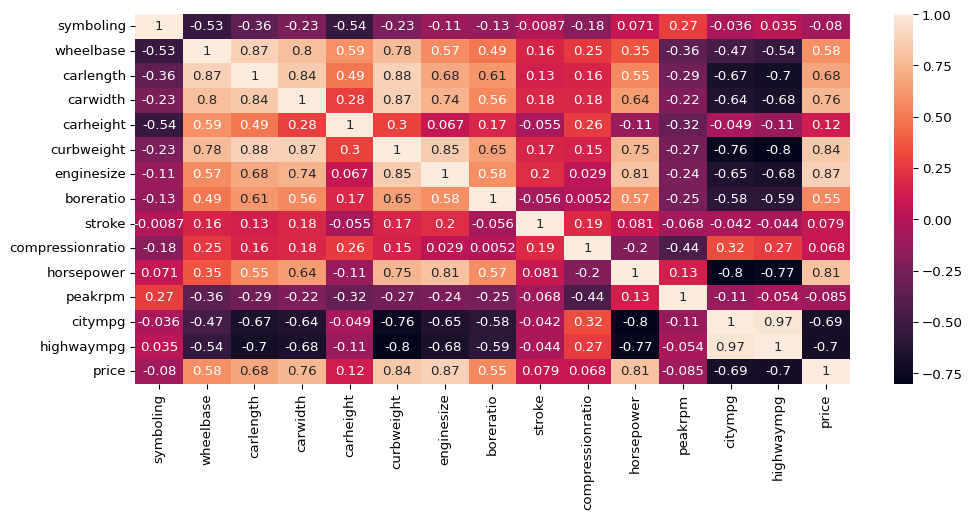

In [42]:
#correlation heatmap between the numeric features.
plt.figure(figsize = (12, 5), dpi = 96)
sns.heatmap(cars_numeric_df.corr(), annot=True)
plt.show()

In [43]:
#first five rows of the 'doornumber' and 'cylindernumber' columns.
cars_df[['doornumber', 'cylindernumber']].head(5)

,doornumber,cylindernumber
0,two,four
1,two,four
2,two,six
3,four,four
4,four,five


In [44]:
#Count the occurrence of each value in the 'cylindernumber' column.
cars_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [45]:
#Count the occurrence of each value in the 'doornumber' column.
cars_df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [46]:
#Using the 'map()' function to replace a words in a Pandas series to their corresponding numeric values.
words = pd.Series(["two", "three", "four", "five", "six", "eight", "twelve"])
words_dict = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8,"twelve": 12}
words = words.map(words_dict)
words

0     2
1     3
2     4
3     5
4     6
5     8
6    12
dtype: int64

In [47]:
#Mapping the values of the 'doornumber' and 'cylindernumber' columns to their corresponding numeric values.
def num_map(series):
    return series.map(words_dict)
# Applying the function to the two columns
cars_df[['cylindernumber', 'doornumber']] = cars_df[['cylindernumber','doornumber']].apply(num_map, axis = 1)

In [48]:
#Display the first five rows of the 'cylindernumber' and 'doornumber' columns. Also, check whether the data-types are integer or not.
print(cars_df[['cylindernumber', 'doornumber']].head())
print(cars_df[['cylindernumber', 'doornumber']].info())

   cylindernumber  doornumber
0               4           2
1               4           2
2               6           2
3               4           4
4               5           4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   cylindernumber  205 non-null    int64
 1   doornumber      205 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB
None


# Feature Encoding

In [49]:
#Creating a DataFrame containing all the non-numeric type features.
cars_categorical_df = cars_df.select_dtypes(include = ['object'])
cars_categorical_df.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [50]:
#Creating dummy variables for all the categorical type columns using the dummy coding process.
cars_dummies_df = pd.get_dummies(cars_categorical_df, drop_first = True, dtype= int)
cars_dummies_df.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#Drop the categorical type columns from the 'cars_df' DataFrame.
cars_df.drop(list(cars_categorical_df.columns), axis = 1, inplace = True)

In [52]:
#Concatenate the 'cars_df' and 'cars_dummies_df' DataFrames.
cars_df = pd.concat([cars_df, cars_dummies_df], axis = 1)
cars_df.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Drop the 'car_ID' column
cars_df.drop('car_ID', axis = 1, inplace = True)

In [54]:
#Get the data-types of all the columns and the number of rows and columns in the 'cars_df' DataFrame.
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   doornumber              205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   carlength               205 non-null    float64
 4   carwidth                205 non-null    float64
 5   carheight               205 non-null    float64
 6   curbweight              205 non-null    int64  
 7   cylindernumber          205 non-null    int64  
 8   enginesize              205 non-null    int64  
 9   boreratio               205 non-null    float64
 10  stroke                  205 non-null    float64
 11  compressionratio        205 non-null    float64
 12  horsepower              205 non-null    int64  
 13  peakrpm                 205 non-null    int64  
 14  citympg                 205 non-null    in

In [55]:
#Split the 'cars_df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(cars_df, test_size = 0.3, random_state =42)

In [56]:
# S2.2: Create separate data-frames for the feature and target variables for both the train and test sets.
features = list(cars_df.columns)
features.remove('price')
X_train = train_df[features]
y_train = train_df['price']
X_test = test_df[features]
y_test = test_df['price']
X_train.shape

(143, 59)

In [57]:
#Normalise the numeric columns.
def standard_norm(series):
    new_series = (series - series.mean()) / series.std()
    return new_series
# Normalising the features in train and test sets.
X_train[X_train.columns[:16]] = X_train[X_train.columns[:16]].apply(standard_norm, axis = 0)
X_test[X_train.columns[:16]] = X_test[X_train.columns[:16]].apply(standard_norm, axis = 0)
X_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
177,-1.494746,0.884304,0.571301,0.076145,0.234282,0.043705,-0.220606,-0.361807,-0.121004,-0.038773,...,0,0,0,0,0,0,0,1,0,0
75,0.124562,-1.122925,0.620694,0.301819,0.921744,0.406597,0.644684,-0.361807,0.313395,1.687015,...,0,0,0,0,0,0,0,0,0,0
174,-1.494746,0.884304,0.571301,0.076145,0.234282,0.446919,-0.178490,-0.361807,-0.410604,-0.185649,...,0,0,0,0,0,0,0,1,0,0
31,0.934216,-1.122925,-2.030063,-2.422386,-0.957319,-1.206257,-1.443881,-0.361807,-0.845003,-1.507529,...,0,0,0,0,0,0,0,0,0,0
12,-0.685092,-1.122925,0.373729,0.172863,-0.544842,0.204990,0.261812,1.392037,0.892594,-0.038773,...,0,0,0,0,0,0,0,0,0,0


# Building Linear Regression Model

In [58]:
# S4.1: Build a linear regression model using all the features to predict car prices.
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, X_train_sm).fit()
lin_reg.params

const                     1.111326e+04
symboling                -2.592601e+02
doornumber                2.563005e+02
wheelbase                 4.621973e+02
carlength                -6.274075e+02
carwidth                  1.488550e+03
carheight                -3.300812e+02
curbweight                2.138008e+03
cylindernumber           -8.478692e+02
enginesize                4.083022e+03
boreratio                -1.027673e+03
stroke                   -7.593749e+01
compressionratio          4.652682e+02
horsepower                2.562853e+02
peakrpm                   8.317857e+02
citympg                   6.391211e+02
highwaympg               -2.399637e+02
fueltype_gas              6.290680e+03
aspiration_turbo          2.528179e+03
carbody_hardtop          -2.337527e+02
carbody_hatchback        -3.517083e+03
carbody_sedan            -3.523827e+03
carbody_wagon            -4.154162e+03
drivewheel_fwd           -8.505823e+02
drivewheel_rwd           -1.393007e+03
enginelocation_rear      

In [59]:
#Summary of the linear regression report.
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     67.51
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           3.52e-53
Time:                        16:58:18   Log-Likelihood:                -1214.5
No. Observations:                 143   AIC:                             2541.
Df Residuals:                      87   BIC:                             2707.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.11

In [60]:
#Calculating the adjusted R-square value
num_rows = X_train.shape[0] # Number of rows or instances
num_predictors = X_train.shape[1] # Number of columns or feature (or independent) variables
r2_score = lin_reg.rsquared # R-squared (or coefficient of determination) value
adj_r2_score = 1 - ((1 - r2_score) * (num_rows - 1))/(num_rows - num_predictors- 1) # Adjusted R-squared calculation
adj_r2_score

0.9608296579974196

In [61]:
# Highly correlated features
major_features = {}
for f in features:
    corr_coef = np.corrcoef(cars_df['price'], cars_df[f])[0, 1]
    if (corr_coef >= 0.5) or (corr_coef <= -0.5):
        major_features[f] = corr_coef
print("Number of features moderately to highly correlated with price =",len(major_features), "\n")
major_features

Number of features moderately to highly correlated with price = 15 



{'wheelbase': 0.5778155982921496,
 'carlength': 0.6829200156779628,
 'carwidth': 0.7593252997415119,
 'curbweight': 0.8353048793372965,
 'cylindernumber': 0.7183049020002816,
 'enginesize': 0.8741448025245112,
 'boreratio': 0.5531732367984434,
 'horsepower': 0.8081388225362212,
 'citympg': -0.68575133602704,
 'highwaympg': -0.6975990916465566,
 'drivewheel_fwd': -0.6019502965330914,
 'drivewheel_rwd': 0.6389565386618764,
 'fuelsystem_2bbl': -0.5013743424965753,
 'fuelsystem_mpfi': 0.5170749892680737,
 'car_company_buick': 0.515094050057132}

In [63]:
# Using RFE to eliminate few features from the dataset.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# RFE with 10 features.
skl_lin_reg = LinearRegression()
rfe1 = RFE(skl_lin_reg,n_features_to_select = 10)
# Fit with 10 features.
rfe1.fit(X_train[major_features.keys()], y_train)
# Print the attributes.
print(major_features.keys(), "\n") # List of features out of which 10 best featuers are to be selected by RFE.
print(rfe1.support_, "\n") # Array containing the boolean values
print(rfe1.ranking_, "\n") # Ranking of the features selected by RFE

dict_keys(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'car_company_buick']) 

[False False  True False  True  True  True  True  True  True  True False
 False  True  True] 

[5 3 1 4 1 1 1 1 1 1 1 6 2 1 1] 



In [64]:
# Building a linear regression model using the 'statsmodels.api' module having the above 10 features selected using RFE.
import statsmodels.api as sm
rfe_features = X_train[major_features.keys()].columns[rfe1.support_]
X_train_rfe1 = X_train[rfe_features]
X_train_rfe1 = sm.add_constant(X_train_rfe1)
sm_lin_reg1 = sm.OLS(y_train, X_train_rfe1).fit()
print(sm_lin_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     91.03
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           3.16e-54
Time:                        17:02:45   Log-Likelihood:                -1336.8
No. Observations:                 143   AIC:                             2696.
Df Residuals:                     132   BIC:                             2728.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.412e+04    618.02

In [65]:
# Check for the VIF values of the 10 features selected by RFE above.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,citympg,19.90
7,highwaympg,17.69
3,enginesize,10.13
2,cylindernumber,6.79
0,const,6.53
5,horsepower,6.06
4,boreratio,2.89
1,carwidth,2.50
8,drivewheel_fwd,2.14
9,fuelsystem_mpfi,2.07


In [67]:
# Use RFE to eliminate few features from the dataset.
skl_lin_reg2 = LinearRegression()
rfe2 = RFE(skl_lin_reg2, n_features_to_select=5)
rfe2.fit(X_train[major_features.keys()], y_train)
print(major_features.keys(), "\n")
print(rfe2.support_, "\n")
print(rfe2.ranking_, "\n")

dict_keys(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'car_company_buick']) 

[False False  True False False  True False  True False False  True False
 False False  True] 

[10  8  1  9  3  1  4  1  6  5  1 11  7  2  1] 



In [68]:
# Build the linear regression model again using the most recently selected features by RFE
import statsmodels.api as sm
rfe_features = X_train[major_features.keys()].columns[rfe2.support_]
X_train_rfe2 = X_train[rfe_features]
X_train_rfe2 = sm.add_constant(X_train_rfe2)
sm_lin_reg2 = sm.OLS(y_train, X_train_rfe2).fit()
print(sm_lin_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           2.00e-58
Time:                        17:04:49   Log-Likelihood:                -1339.8
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     137   BIC:                             2709.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.436e+04    427.39

In [69]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,4.18
3,horsepower,3.35
0,const,3.11
1,carwidth,2.16
4,drivewheel_fwd,1.49
5,car_company_buick,1.46


In [70]:
#Creating a list of final features and build a linear regression model using the 'sklearn' module.
X_train_final = X_train_rfe2.drop(columns = 'const')
sk_lin_reg_final = LinearRegression().fit(X_train_final, y_train)
y_train_pred = sk_lin_reg_final.predict(X_train_final)
y_train_pred[:10]

array([11614.67148027, 20805.93850454,  9737.85451687,  6747.05425956,
       16681.44092811,  6824.7936787 , 19864.14770684, 10931.14320868,
        7165.9828108 , 15535.30134   ])

In [71]:
#Evaluating the linear regression model using the 'r2_score','mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_squared_log_error
print("Train set")
print('-' * 50)
train_r2_score = r2_score(y_train, y_train_pred)
train_adj_r2_score = 1 - (1 - train_r2_score) * (X_train.shape[0] - 1)/(X_train.shape[0] - X_train.shape[1] - 1)
print(f"R-squared = {train_r2_score:.3f}")
print(f"Adjusted R-squared = {train_adj_r2_score:.3f}")
print(f"Mean absolute error = {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"Mean squared error = {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root mean squared error = {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")

Train set
--------------------------------------------------
R-squared = 0.868
Adjusted R-squared = 0.774
Mean absolute error = 2080.494
Mean squared error = 8042954.083
Root mean squared error = 2836.010


In [83]:
#Evaluate the linear regression model based on MSLE.
print(f"Mean squared log error = {mean_squared_log_error(y_train,y_train_pred):.3f}")

Mean squared log error = 0.034


# Residual Analysis

Mean of residuals = 0.000



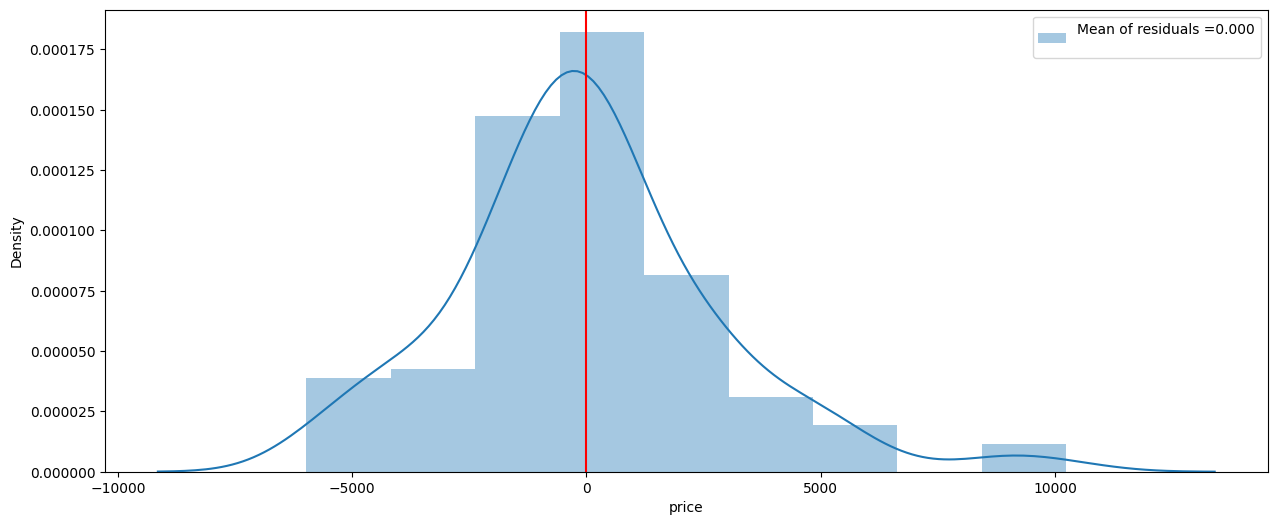

In [74]:
#Creating a histogram for the errors obtained in the predicted values for the train set.
train_residuals = y_train - y_train_pred
print(f"Mean of residuals = {np.mean(train_residuals):.3f}\n")
plt.figure(figsize = (15, 6))
sns.distplot(train_residuals, bins = 'sturges', label = f"Mean of residuals ={np.mean(train_residuals):.3f}\n")
plt.axvline(x = np.mean(train_residuals), color = 'red')
plt.legend()
plt.show()

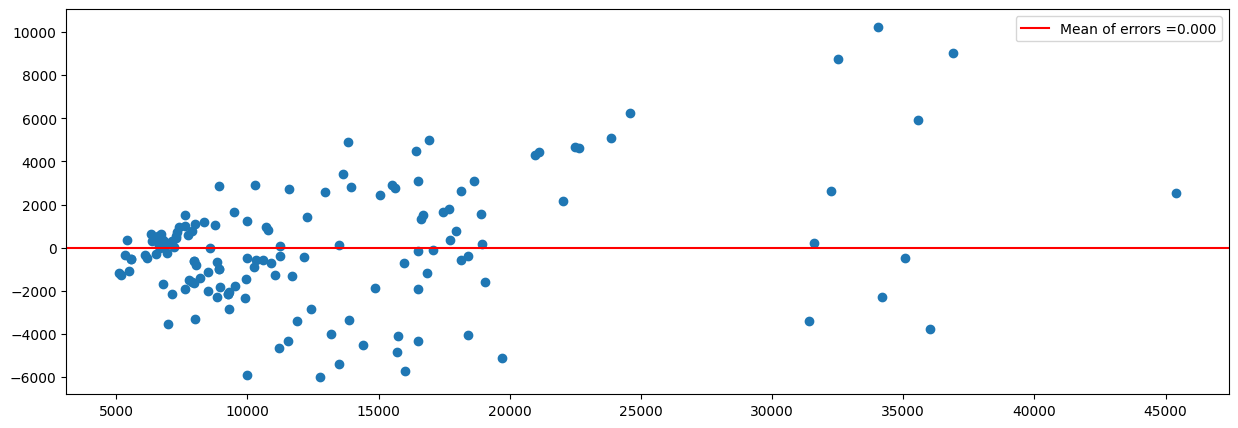

In [75]:
#Creating a scatter plot between 'train_residuals' and 'y_train'.
plt.figure(figsize = (15, 5))
plt.scatter(y_train, train_residuals)
plt.axhline(y = train_residuals.mean(), color = 'r', label = f'Mean of errors ={train_residuals.mean():.3f}')
plt.legend()
plt.show()

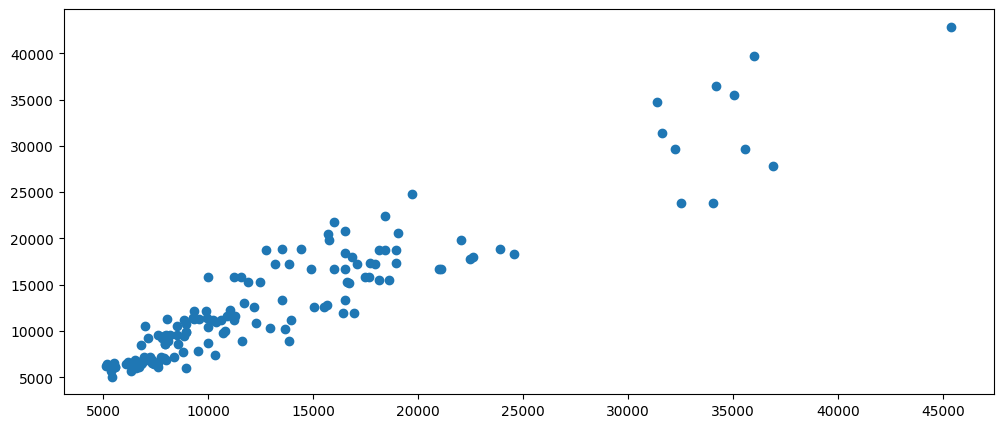

In [76]:
#Scatter plot for actual values and predictions of the training data set
plt.figure(figsize = (12, 5))
plt.scatter(y_train, y_train_pred)
plt.show()

In [78]:
#Predicting the car prices on the test set.
X_test = X_test[X_train_final.columns]
y_test_pred = sk_lin_reg_final.predict(X_test)
y_test_pred[:10]

array([25551.02324283, 20149.47788471, 11279.52529162, 13225.58115796,
       31017.07788154,  6944.38671721,  7429.93375271,  7562.49609129,
       10510.58085045,  7276.13263097])

In [79]:
#Evaluating the linear regression model using the 'r2_score','mean_squared_error' & 'mean_absolute_error', 'mean_squared_log_error'functions of the 'sklearn' module.
print("Test set")
print('-' * 50)
test_r2_score = r2_score(y_test, y_test_pred)
test_adj_r2_score = 1 - (1 - test_r2_score) * (X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)
print(f"R-squared = {test_r2_score:.3f}")
print(f"Adjusted R-squared = {test_adj_r2_score:.3f}")
print(f"Mean absolute error = {mean_absolute_error(y_test, y_test_pred):.3f}")
print(f"Mean squared error = {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root mean squared error = {np.sqrt(mean_squared_error(y_test,y_test_pred)):.3f}")
print(f"\nMean squared log error = {mean_squared_log_error(y_test, y_test_pred):.3f}")

Test set
--------------------------------------------------
R-squared = 0.791
Adjusted R-squared = 0.772
Mean absolute error = 2566.663
Mean squared error = 14513862.919
Root mean squared error = 3809.706

Mean squared log error = 0.133


Mean of residuals = -694.585



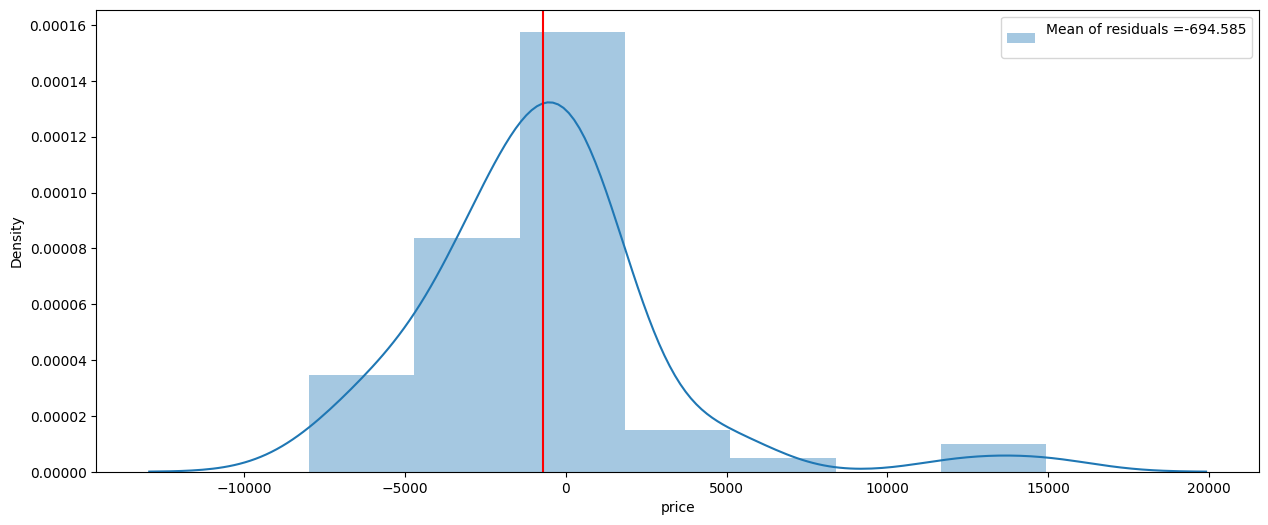

In [80]:
#Creating a histogram for the errors obtained in the predicted values for the testing set.
test_residuals = y_test - y_test_pred
print(f"Mean of residuals = {np.mean(test_residuals):.3f}\n")
plt.figure(figsize = (15, 6))
sns.distplot(test_residuals, bins = 'sturges', label = f"Mean of residuals ={np.mean(test_residuals):.3f}\n")
plt.axvline(x = np.mean(test_residuals), color = 'red')
plt.legend()
plt.show()

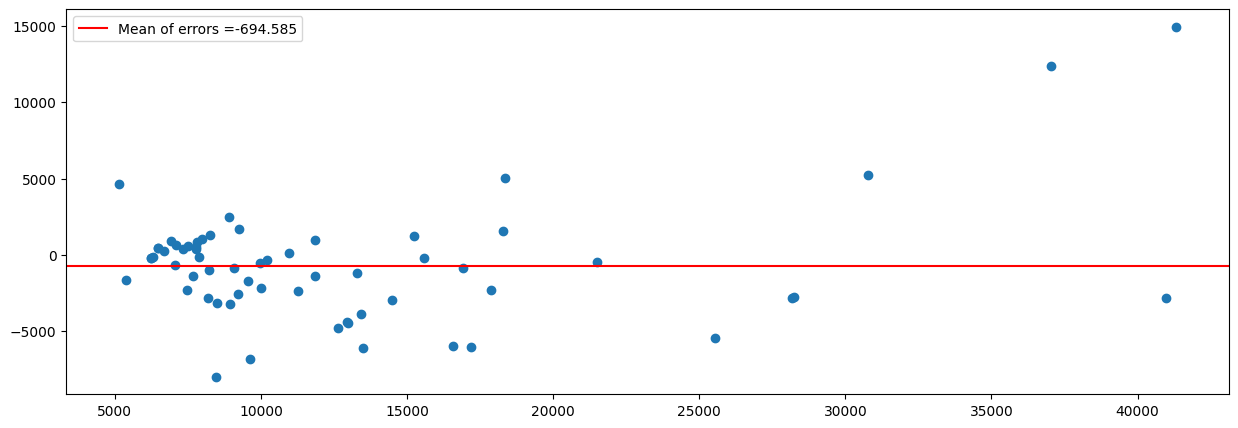

In [81]:
#Creating a scatter plot for the errors obtained in the actual values for the test set for checking homoscedasticity .
plt.figure(figsize = (15, 5))
plt.scatter(y_test, test_residuals)
plt.axhline(y = test_residuals.mean(), color = 'r', label = f'Mean of errors ={test_residuals.mean():.3f}')
plt.legend()
plt.show()

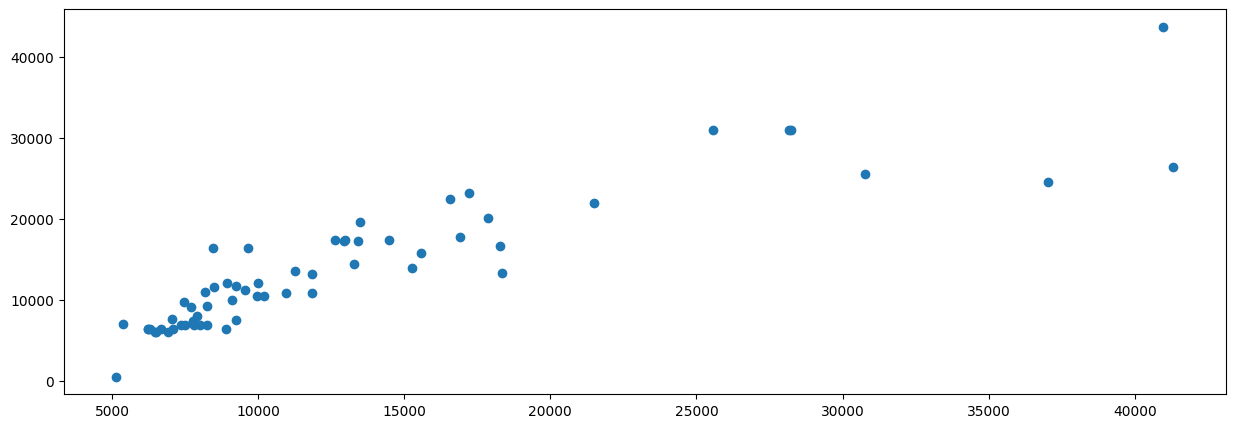

In [82]:
#Create a scatter plot for the actual values and the predictions of the testing dataset.
plt.figure(figsize = (15, 5))
plt.scatter(y_test, y_test_pred)
plt.show()

So finally the most important features and their corresponding regression coeffients are

Feature Coefficient

carwidth 1696.2271

enginesize 2636.6328

horsepower 2363.8354

drivewheel_fwd -2016.6827

car_company_buick 7984.8761

Hence, the regression equation is

Y = 14360 + 1696.2271x1 + 2636.6328x2 + 2363.8354x3 − 2016.6827x4 + 7984.8761x5

where

• Y is the price of a car

• x1 is carwidth

• x2 is enginesize

• x3 is horsepower

• x4 is drivewheel_fwd

• x5 is car_company_buick